1. Import Library

In [1]:
#Library processing data
from google.colab import files
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

#Library vizualitation data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Library model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

2. Connect Collab To Google Drive

In [2]:
# connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3. Data Understanding

In [3]:
# Load dataset using pandas
df = pd.read_csv("/content/drive/MyDrive/Dataset/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# Get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# Count null values
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [6]:
# Info shape from dataset
df.shape

(100000, 9)

In [7]:
# describe basic statistic from dataset
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


4. Exploratory Data Analysis

In [8]:
# Split feature dataset to categorical and numerical
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

4.1 Categorical Visualization

        jumlah sampel  persentase
gender                           
Female          58552        58.6
Male            41430        41.4
Other              18         0.0


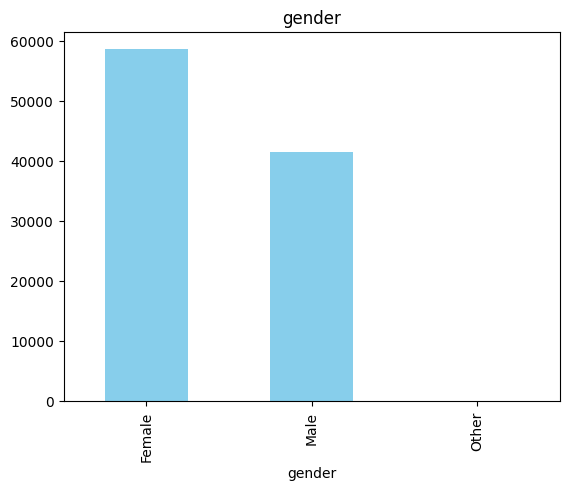

In [9]:
feature_gender = categorical_features[0]
count = df[feature_gender].value_counts()
percent = 100*df[feature_gender].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature_gender,color='skyblue');

              jumlah sampel  persentase
hypertension                           
0                     92515        92.5
1                      7485         7.5


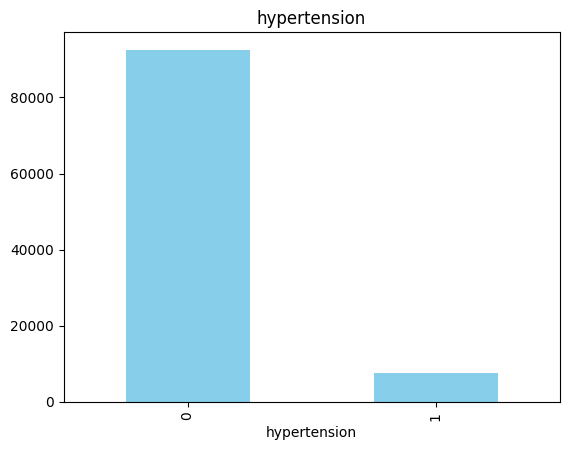

In [10]:
feature_hyper = categorical_features[1]
count = df[feature_hyper].value_counts()
percent = 100*df[feature_hyper].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature_hyper, color='skyblue');

               jumlah sampel  persentase
heart_disease                           
0                      96058        96.1
1                       3942         3.9


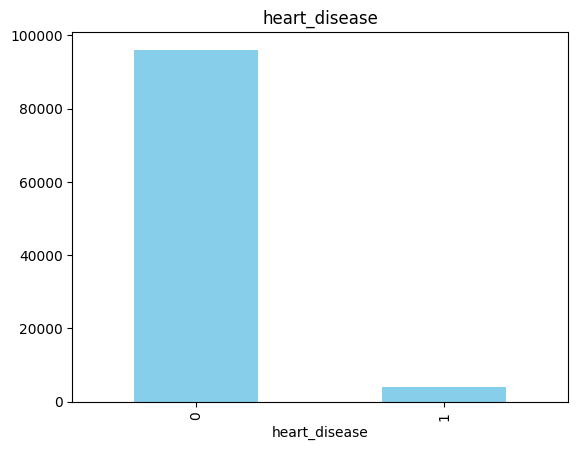

In [11]:
feature_heart = categorical_features[2]
count = df[feature_heart].value_counts()
percent = 100*df[feature_heart].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature_heart, color='skyblue');

                 jumlah sampel  persentase
smoking_history                           
No Info                  35816        35.8
never                    35095        35.1
former                    9352         9.4
current                   9286         9.3
not current               6447         6.4
ever                      4004         4.0


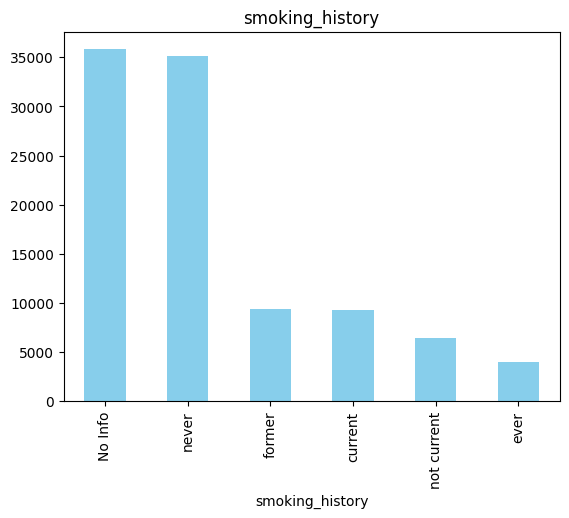

In [12]:
feature_smoke = categorical_features[3]
count = df[feature_smoke].value_counts()
percent = 100*df[feature_smoke].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature_smoke, color='skyblue');

4.2 Numerical Visualization

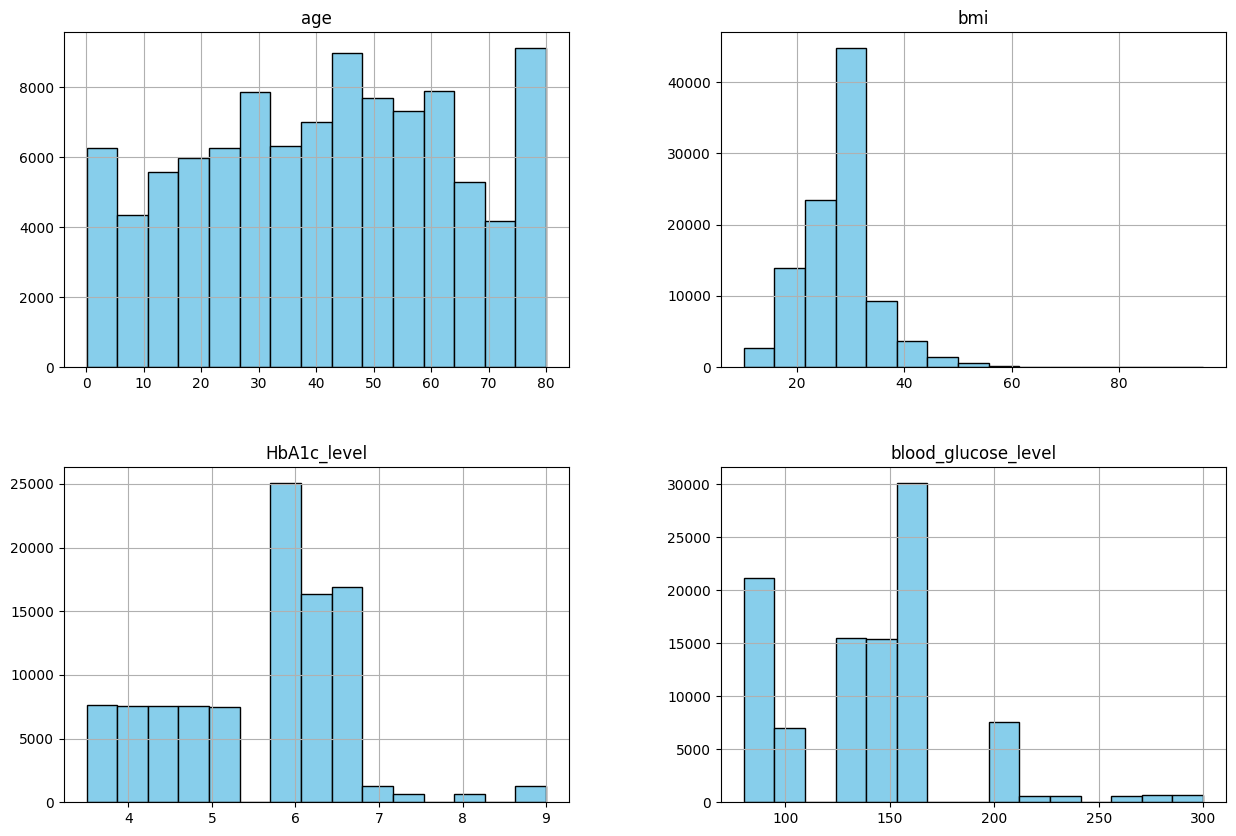

In [13]:
df_numerical = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
df_numerical.hist(bins=15, figsize=(15,10),color='skyblue', edgecolor='black')
plt.show()

4.3 Correlation Feature

<Axes: >

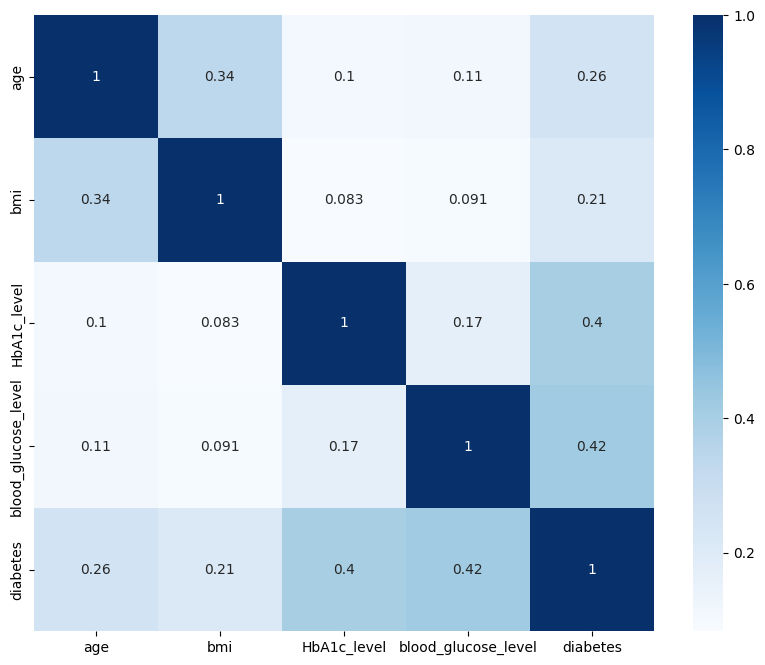

In [14]:
df_numerical = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','diabetes']]
plt.figure(figsize = (10,8))
sns.heatmap(df_numerical.corr(), annot = True,cmap='Blues')

5. Data Processing

5.1 Categorical Encoding

In [15]:
print("Unique Values for Gender", df['gender'].unique())
print("Unique Values for smoking_history", df['smoking_history'].unique())

Unique Values for Gender ['Female' 'Male' 'Other']
Unique Values for smoking_history ['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [16]:
encoding_gender = {"gender":     {"Male": 0, "Female": 1, "Other": 2}}
df.replace(encoding_gender, inplace=True)

encoding_smoke = {"smoking_history":     {"never": 0, "No Info": 1, "current": 2, "former": 3, "ever": 4, "not current": 5}}
df.replace(encoding_smoke, inplace=True)

5.2 Imbalance Label

In [17]:
df.diabetes.value_counts()

,count
diabetes,
0,91500
1,8500


In [18]:
no_diabetes  = df[df['diabetes']==0]
diabetes = df[df['diabetes']==1]

df_minority_resampled = resample(diabetes, replace = True, n_samples = 91500)

df = pd.concat([no_diabetes, df_minority_resampled])

In [19]:
df.diabetes.value_counts()

,count
diabetes,
0,91500
1,91500


5.3 Split train and test

In [20]:
x = df.drop('diabetes',axis=1)
y = df['diabetes']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_train.shape)
print(x_test.shape)

(146400, 8)
(36600, 8)


5.4 Normalization Dataset

In [22]:
sc=StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

6. Create and Evaluate Model

In [23]:
RandomForest = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RandomForest.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=50, n_jobs=-1,
                       random_state=55)

In [24]:
pred = RandomForest.predict(x_test)
accuracy_score(y_test, pred)

0.9492076502732241

In [25]:
cr = classification_report(y_test, pred, output_dict=True)
pd.DataFrame(cr).transpose()

,precision,recall,f1-score,support
0,0.963786,0.933063,0.948175,18226.000000
1,0.935637,0.965223,0.950200,18374.000000
accuracy,0.949208,0.949208,0.949208,0.949208
macro avg,0.949711,0.949143,0.949187,36600.000000
weighted avg,0.949654,0.949208,0.949192,36600.000000


<Axes: >

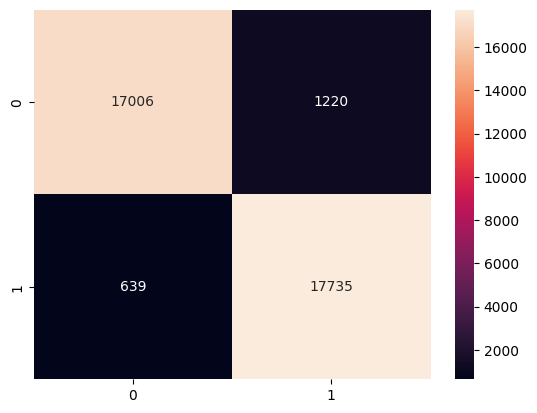

In [26]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,fmt="d")

In [27]:
Knn = KNeighborsClassifier(n_neighbors=10)
Knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [28]:
pred = Knn.predict(x_test)

In [29]:
accuracy_score(y_test, pred)

0.9379508196721311

In [30]:
cr = classification_report(y_test, pred, output_dict=True)
pd.DataFrame(cr).transpose()

,precision,recall,f1-score,support
0,0.977494,0.896028,0.934990,18226.000000
1,0.904740,0.979536,0.940654,18374.000000
accuracy,0.937951,0.937951,0.937951,0.937951
macro avg,0.941117,0.937782,0.937822,36600.000000
weighted avg,0.940970,0.937951,0.937833,36600.000000


<Axes: >

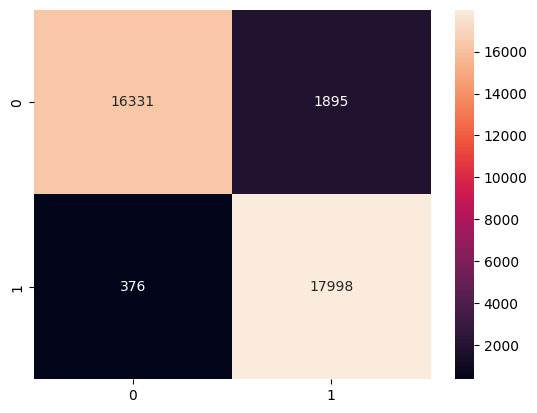

In [31]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,fmt="d")